In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Initial Prep

In [4]:
#change path if necessary
coupon = pd.read_csv("in-vehicle-coupon-recommendation.csv")
coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#rename columns for clarity
coupon = coupon.rename(columns={'passanger': 'passenger'})

In [6]:
#check for duplicated rows
coupon.duplicated().sum()

74

In [7]:
#rows with duplicate entries
coupon[coupon.duplicated()] 

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [8]:
#drop duplicates
coupon = coupon.drop_duplicates()
coupon.duplicated().sum()

0

In [9]:
#check for null values
coupon.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [10]:
#descriptive statistics for numerical variables
coupon.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#drop high missing value columns and unnecessary/redundant columns
#car: many missing values
#direction_opp: redundant with direction_same column
#toCoupon_GEQ5min: has STD of 0, all values are 1
coupon = coupon.drop(columns = ['car', 'direction_opp', 'toCoupon_GEQ5min'])

In [12]:
coupon.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
Y                        int64
dtype: object

In [13]:
#convert object type variables to categorical
for col in coupon.select_dtypes(include='object').columns:
    coupon[col] = coupon[col].astype('category')

#convert temperature (already pre-bucked in data) into clearer categories
coupon['temperature'] = coupon['temperature'].map({
    30: 'Cold',
    55: 'Cool',
    80: 'Warm'
})

#convert temperature to categorical type
coupon['temperature'] = coupon['temperature'].astype('category')

#updated data types
coupon.dtypes

destination             category
passenger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
Y                          int64
dtype: object

# EDA

In [14]:
coupon['Y'].value_counts()

Y
1    7157
0    5453
Name: count, dtype: int64

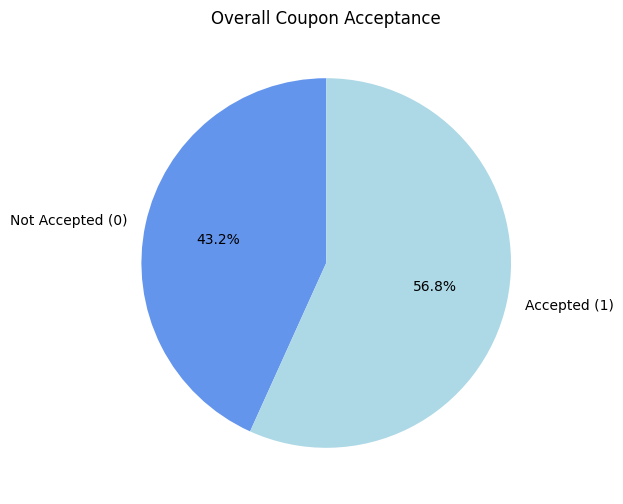

In [15]:
plt.rcParams['figure.figsize'] = (8, 5)

y_counts = coupon['Y'].value_counts().sort_index()
labels = ['Not Accepted (0)', 'Accepted (1)']

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(y_counts, labels=labels, autopct='%1.1f%%',
       startangle=90, colors=['#6495ED', '#ADD8E6'])
ax.set_title("Overall Coupon Acceptance")
plt.show()


/tmp/ipykernel_65/3156544607.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coupon.groupby('coupon')['Y'].mean().sort_values().plot(kind='bar', color='steelblue')


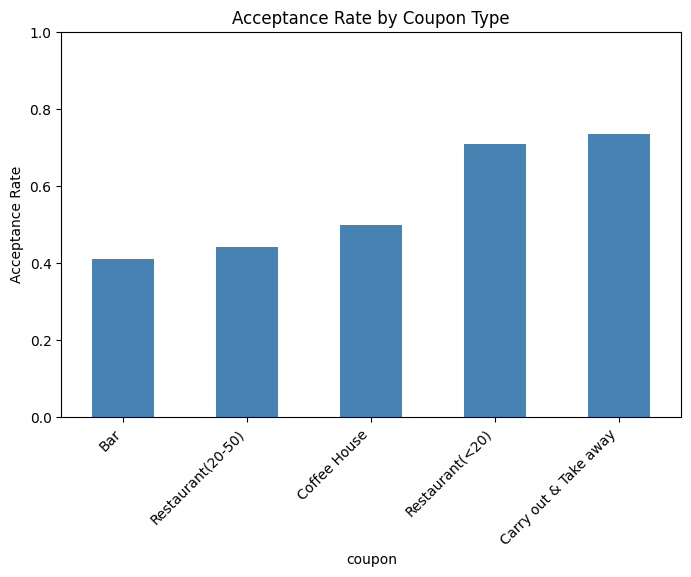

In [16]:
coupon.groupby('coupon')['Y'].mean().sort_values().plot(kind='bar', color='steelblue')
plt.title("Acceptance Rate by Coupon Type")
plt.ylabel("Acceptance Rate")
plt.ylim(0,1)
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_65/3064106662.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_time = coupon.groupby('time')['Y'].mean().reindex(time_order)


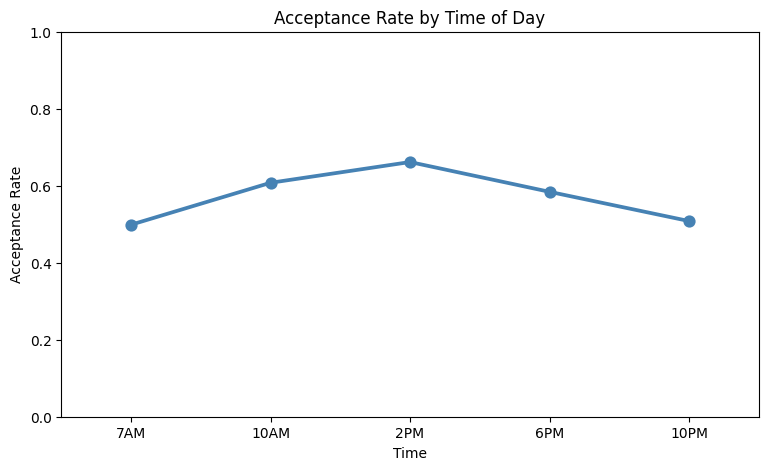

In [17]:
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
acc_time = coupon.groupby('time')['Y'].mean().reindex(time_order)

plt.figure(figsize=(9,5))
sns.pointplot(x=acc_time.index, y=acc_time.values, color='steelblue')
plt.title("Acceptance Rate by Time of Day")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.xlabel("Time")
plt.show()

/tmp/ipykernel_65/2600153341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc = coupon.groupby(['coupon','time'])['Y'].mean().reset_index()


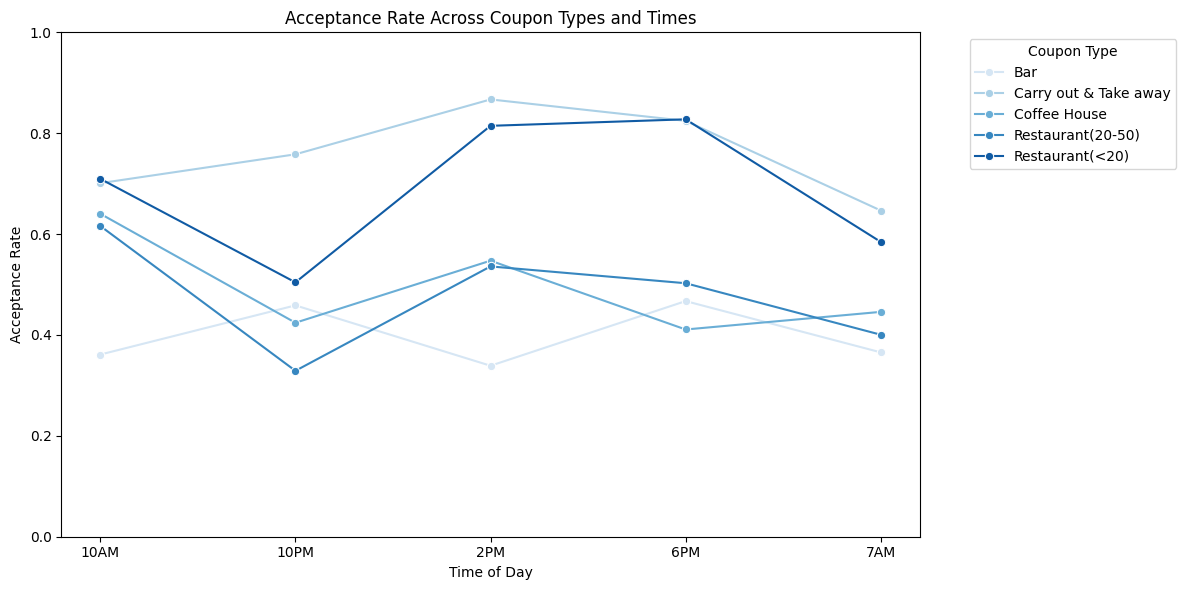

In [18]:
acc = coupon.groupby(['coupon','time'])['Y'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=acc, x="time", y="Y", hue="coupon", marker="o", palette='Blues')
plt.title("Acceptance Rate Across Coupon Types and Times")
plt.ylabel("Acceptance Rate")
plt.ylim(0,1)
plt.xlabel("Time of Day")
plt.legend(title="Coupon Type", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

/tmp/ipykernel_65/4085075301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_pass = coupon.groupby('passenger')['Y'].mean().sort_values()


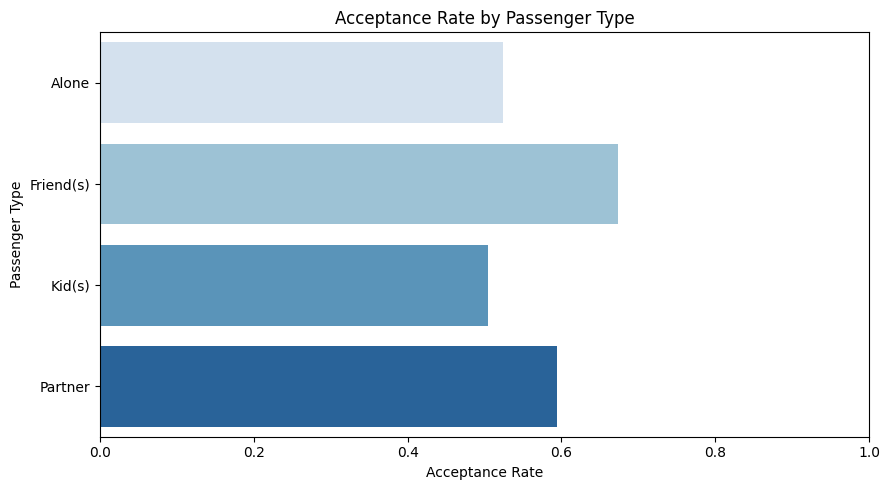

In [19]:
acc_pass = coupon.groupby('passenger')['Y'].mean().sort_values()

plt.figure(figsize=(9,5))
sns.barplot(
    x=acc_pass.values,
    y=acc_pass.index,
    hue=acc_pass.index,
    palette="Blues",
    legend=False
)

plt.title("Acceptance Rate by Passenger Type")
plt.xlabel("Acceptance Rate")
plt.xlim(0,1)
plt.ylabel("Passenger Type")
plt.tight_layout()
plt.show()

/tmp/ipykernel_65/343834226.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_income = coupon.groupby('income')['Y'].mean().sort_values()


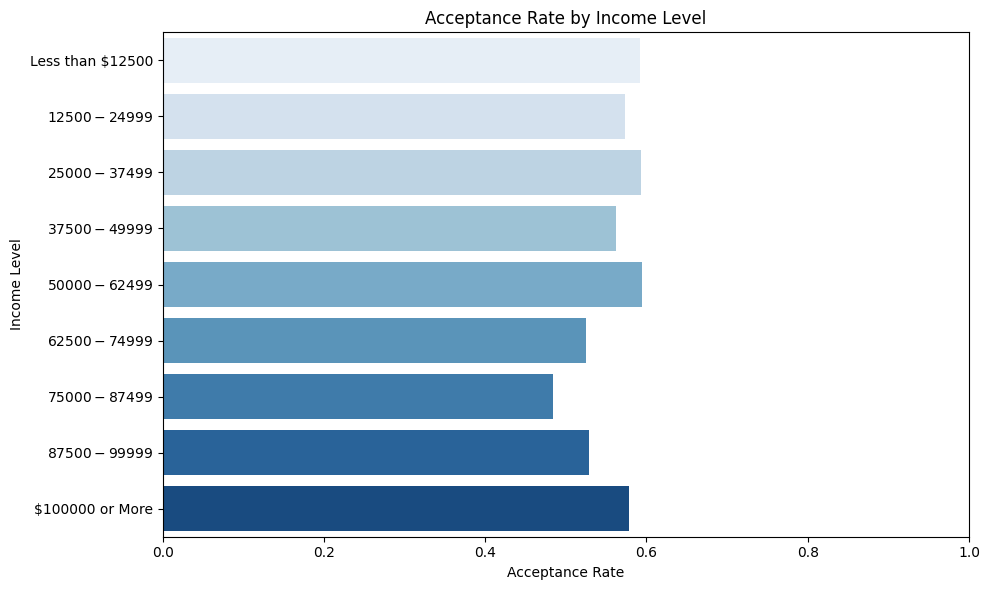

In [20]:
income_order = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999',
    '$50000 - $62499',
    '$62500 - $74999',
    '$75000 - $87499',
    '$87500 - $99999',
    '$100000 or More'
]
coupon['income'] = pd.Categorical(coupon['income'], categories=income_order, ordered=True)

acc_income = coupon.groupby('income')['Y'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=acc_income.values, y=acc_income.index, hue=acc_income.index, palette='Blues', legend=False)
plt.title("Acceptance Rate by Income Level")
plt.xlabel("Acceptance Rate")
plt.ylabel("Income Level")
plt.xlim(0,1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

#drop occupation for the model - too many categories
X = coupon.drop(columns=['Y', 'occupation'])
y = coupon['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Imputing Missing Values

In [22]:
#Use Simple Imputer to fill missing values
from sklearn.impute import SimpleImputer

#Frequency variables
freq_cols = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]

#Impute frequency columns (have NA values) with most frequent categories for X_train and X_test
imputer = SimpleImputer(strategy="most_frequent")
X_train[freq_cols] = imputer.fit_transform(X_train[freq_cols])
X_test[freq_cols] = imputer.transform(X_test[freq_cols])

## Encoding Categorical Features

In [23]:
#Use ordinal encoding for frequency variables, age, and income which have natural order/ranking
from sklearn.preprocessing import OrdinalEncoder

#Category orders
freq_order = ["never", "less1", "1~3", "4~8", "gt8"]
age_order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
income_order = [
    "Less than $12500", "$12500 - $24999", "$25000 - $37499",
    "$37500 - $49999", "$50000 - $62499", "$62500 - $74999",
    "$75000 - $87499", "$87500 - $99999", "$100000 or More"
]

#Columns to encode
ordinal_cols = ["age", "income"] + freq_cols

#Initialize encoder
ordinal_encoder = OrdinalEncoder(categories=[age_order, income_order] + [freq_order]*len(freq_cols))

#Fit on X_train
X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols]).astype(int)

#Transform X_test
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols]).astype(int)

In [24]:
#use One Hot Encoding for the remaining nominal categorical variables
from sklearn.preprocessing import OneHotEncoder

#Nominal variables to encode
nominal_cols = ["temperature", "destination", "passenger", "weather", "time", 
                "coupon", "expiration", "maritalStatus", "gender", "education"]

#Initialize encoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

#Fit on training and transform train and test data
X_train_ohe = ohe.fit_transform(X_train[nominal_cols]).astype(int)
X_test_ohe = ohe.transform(X_test[nominal_cols]).astype(int)

#Convert to DataFrames with proper column names
ohe_cols = ohe.get_feature_names_out(nominal_cols)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)

In [25]:
#Drop original column names and join encoded columns
X_train_final = X_train.drop(columns=nominal_cols).join(X_train_ohe)
X_test_final = X_test.drop(columns=nominal_cols).join(X_test_ohe)

In [26]:
X_train_final.describe()

,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,...,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,gender_Male,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree
count,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,...,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000,10088.000000
mean,3.260607,0.416039,3.734239,1.021610,1.563045,2.417922,2.283803,1.269231,0.557395,0.116772,...,0.402954,0.374603,0.169707,0.010508,0.483941,0.345460,0.144132,0.071174,0.007732,0.343477
std,2.130934,0.492925,2.545677,1.094489,1.238565,0.921852,0.921230,0.881767,0.496720,0.321165,...,0.490516,0.484044,0.375393,0.101971,0.499767,0.475542,0.351241,0.257127,0.087595,0.474893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,7.000000,1.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#rename columns to remove '<' symbol (prevent errors later)
X_train_final = X_train_final.rename(columns={
    "coupon_Restaurant(<20)": "coupon_Restaurant_lt_20"
})

X_test_final = X_test_final.rename(columns={
    "coupon_Restaurant(<20)": "coupon_Restaurant_lt_20"
})

# Model Building

## XGBoost - Base

In [28]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initialize XGBoost Model
xgb_model = XGBClassifier(
    random_state=42, 
    eval_metric='logloss',
    max_depth = 5,
    learning_rate = 0.1,
    reg_lambda = 1,
    reg_alpha = 0.1    
)

#Train model
xgb_model.fit(X_train_final, y_train)

#Model predictions on train and test data
y_train_pred = xgb_model.predict(X_train_final)
y_test_pred = xgb_model.predict(X_test_final)

#Accuracy, Precision, Recall
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 29.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Train Accuracy: 0.7922283901665345
Test Accuracy: 0.7200634417129262

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.66      1106
           1       0.73      0.80      0.76      1416

    accuracy                           0.72      2522
   macro avg       0.72      0.71      0.71      2522
weighted avg       0.72      0.72      0.72      2522



## XGBoost - Hyperparameter Tuning + Evaluation

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

#hyperparameters to tune
param_grid = {
    'max_depth': [3, 4],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.03, 0.05, 0.1],
    'subsample': [0.7, 0.85, 1.0],
    'reg_lambda': [1, 3],
    'reg_alpha': [0.1, 1]
}

#Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,             
    verbose=0,
    n_jobs=-1
)

#Fit on training data
grid_search.fit(X_train_final, y_train)

#Best parameters after tuning and best model score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

#Evaluate on train and test sets
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_final)
y_test_pred = best_model.predict(X_test_final)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))


Best parameters found: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.85}
Best cross-validation accuracy: 0.7979266467346262
Train Accuracy: 0.760904044409199
Test Accuracy: 0.7172878667724029

Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      4347
           1       0.77      0.83      0.80      5741

    accuracy                           0.76     10088
   macro avg       0.76      0.75      0.75     10088
weighted avg       0.76      0.76      0.76     10088


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66      1106
           1       0.73      0.79      0.76      1416

    accuracy                           0.72      2522
   macro avg       0.71      0.71      0.71      2522
weighted avg       0.72      0.72      0.71      2522



### Confusion Matrix

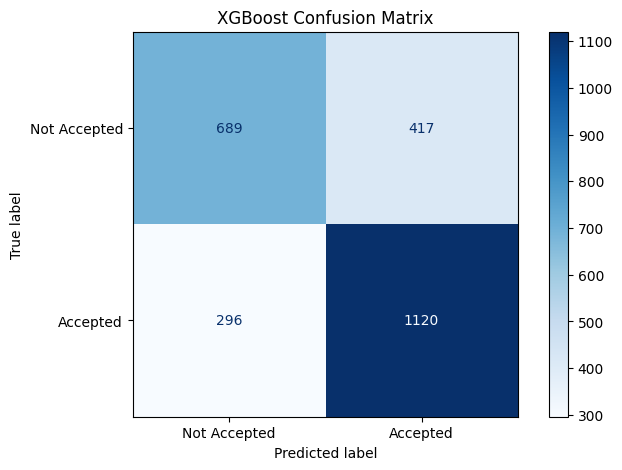

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp_base = ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test_final,
    y_test,
    cmap='Blues',
    display_labels=["Not Accepted", "Accepted"]  
)

disp_base.ax_.set_title("XGBoost Confusion Matrix")
plt.show()

### ROC Curve, Precision-Recall Curve, and AUC

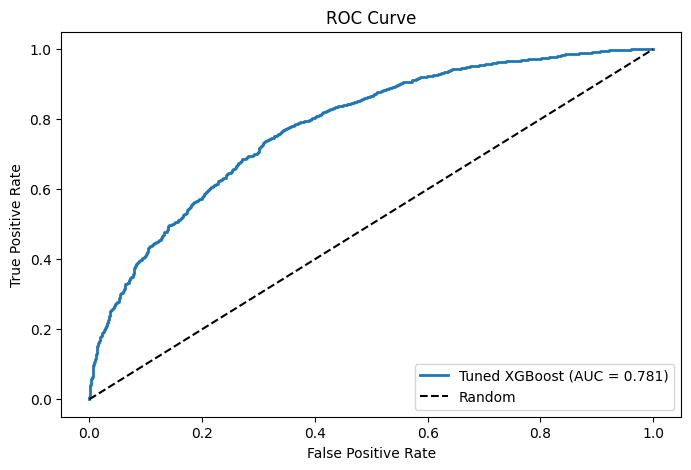

In [31]:
from sklearn.metrics import roc_curve, auc

y_proba_tuned = best_model.predict_proba(X_test_final)[:, 1]

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
plt.figure()
plt.plot(fpr_tuned, tpr_tuned, lw=2, label=f'Tuned XGBoost (AUC = {roc_auc_tuned:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

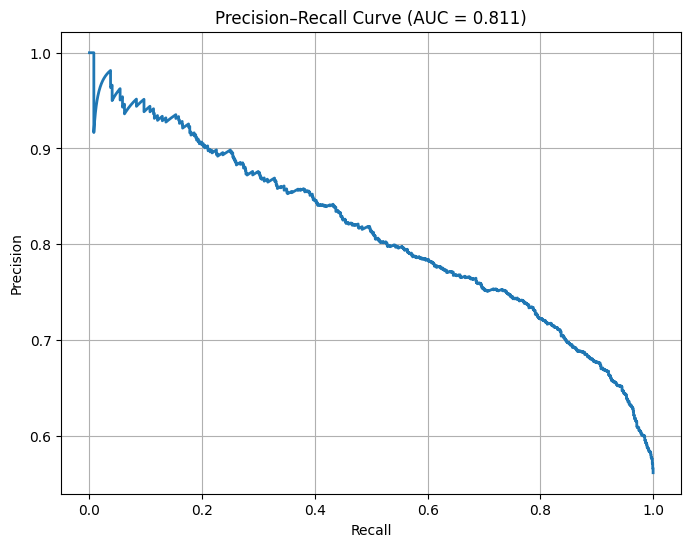

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision, recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_tuned)

# Compute AUPRC (Area Under Precision–Recall Curve)
avg_precision = average_precision_score(y_test, y_proba_tuned)

# Plot the Precision–Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AUC = {avg_precision:.3f})")
plt.grid(True)
plt.show()


### XGBoost Feature Importance

In [33]:
feature_names = X_train_final.columns 

importances = pd.Series(
    best_model.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

print(importances)

coupon_Restaurant_lt_20                             0.082272
toCoupon_GEQ25min                                   0.070953
coupon_Carry out & Take away                        0.068332
expiration_2h                                       0.047815
passenger_Friend(s)                                 0.044835
destination_No Urgent Place                         0.042622
coupon_Coffee House                                 0.038212
CoffeeHouse                                         0.037173
weather_Sunny                                       0.035089
toCoupon_GEQ15min                                   0.032200
direction_same                                      0.028588
time_10PM                                           0.027234
passenger_Kid(s)                                    0.023795
maritalStatus_Unmarried partner                     0.023105
time_6PM                                            0.022371
maritalStatus_Married partner                       0.022084
Bar                     

Text(0.5, 1.0, 'Top 10 XGBoost Feature Importances')

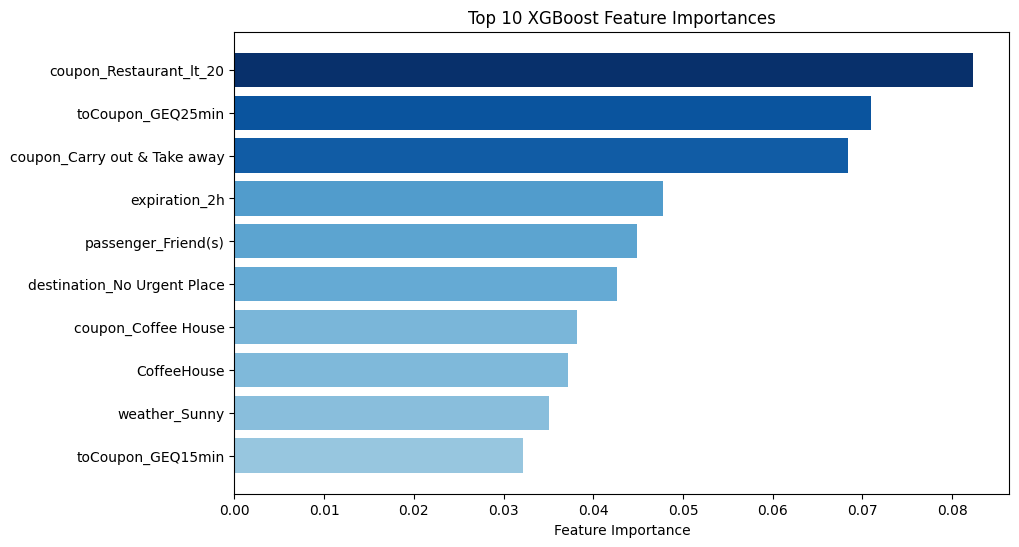

In [34]:
import matplotlib.cm as cm

# Select top 10 features
top_10 = importances.head(10)

colors = cm.Blues(top_10 / top_10.max())

# Plot horizontal bar chart with colormap
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10.index, top_10.values, color=colors)
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel("Feature Importance")
plt.title("Top 10 XGBoost Feature Importances")

## Neural Network - Base

In [35]:
X_train_nn = X_train_final.values
X_test_nn = X_test_final.values

# y_train and y_test are already numpy arrays
y_train_nn = y_train
y_test_nn = y_test

feature_names = X_train_final.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

# Overwrite for convenience so later code still works
X_train_nn = X_train_nn_scaled
X_test_nn = X_test_nn_scaled

print("X_train_nn:", X_train_nn.shape)
print("X_test_nn:", X_test_nn.shape)

X_train_nn: (10088, 39)
X_test_nn: (2522, 39)


In [36]:
from sklearn.neural_network import MLPClassifier

# Base (simpler) neural network
base_nn = MLPClassifier(
    hidden_layer_sizes=(32,),     # one hidden layer, 32 neurons
    activation="relu",
    solver="adam",
    random_state=0,
    max_iter=500
)

# Train model 
base_nn.fit(X_train_nn, y_train_nn)

# Bace accuracy
base_train_acc = base_nn.score(X_train_nn, y_train_nn) 
base_test_acc = base_nn.score(X_test_nn, y_test_nn) 

print(f"Neural Network Train Accuracy: {base_train_acc:.4f}") 
print(f"Neural Network Test Accuracy: {base_test_acc:.4f}")

Neural Network Train Accuracy: 0.8042
Neural Network Test Accuracy: 0.7010


## Tuned Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Tuned neural network (smaller, stronger regularization, early stopping)
tuned_nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # smaller network
    activation="relu",
    solver="adam",
    alpha=0.005,                   # stronger L2 regularization
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=0,
    early_stopping=True,           # stop when validation score stops improving
    validation_fraction=0.15,
    n_iter_no_change=20
)

# ---- Train model ----
tuned_nn.fit(X_train_nn, y_train_nn)

# ---- Predictions for train & test ----
y_train_pred = tuned_nn.predict(X_train_nn)
y_test_pred  = tuned_nn.predict(X_test_nn)

# ---- Accuracies ----
tuned_train_acc = accuracy_score(y_train_nn, y_train_pred)
tuned_test_acc  = accuracy_score(y_test_nn, y_test_pred)

print(f"Tuned NN - Train Accuracy: {tuned_train_acc:.4f}")
print(f"Tuned NN - Test Accuracy:  {tuned_test_acc:.4f}")

# ---- Classification reports ----
print("\nTraining Classification Report:\n")
print(classification_report(y_train_nn, y_train_pred, target_names=["No", "Yes"]))

print("\nTesting Classification Report:\n")
print(classification_report(y_test_nn, y_test_pred, target_names=["No", "Yes"]))

Tuned NN - Train Accuracy: 0.8013
Tuned NN - Test Accuracy:  0.7098

Training Classification Report:

              precision    recall  f1-score   support

          No       0.79      0.73      0.76      4347
         Yes       0.81      0.86      0.83      5741

    accuracy                           0.80     10088
   macro avg       0.80      0.79      0.80     10088
weighted avg       0.80      0.80      0.80     10088


Testing Classification Report:

              precision    recall  f1-score   support

          No       0.69      0.62      0.65      1106
         Yes       0.73      0.78      0.75      1416

    accuracy                           0.71      2522
   macro avg       0.71      0.70      0.70      2522
weighted avg       0.71      0.71      0.71      2522



## Evaluating Tuned Neural Network

In [38]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    accuracy_score
)

# Use tuned_nn as the final model
y_pred_nn = tuned_nn.predict(X_test_nn)
y_prob_nn = tuned_nn.predict_proba(X_test_nn)[:, 1]

test_acc_nn = accuracy_score(y_test_nn, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test_nn, y_prob_nn)

print(f"Final Tuned NN - Test Accuracy: {test_acc_nn:.4f}")
print(f"Final Tuned NN - ROC AUC:      {roc_auc_nn:.4f}")

Final Tuned NN - Test Accuracy: 0.7098
Final Tuned NN - ROC AUC:      0.7715


### Confusion Matrix

Confusion Matrix (Tuned NN):
 [[ 689  417]
 [ 315 1101]]


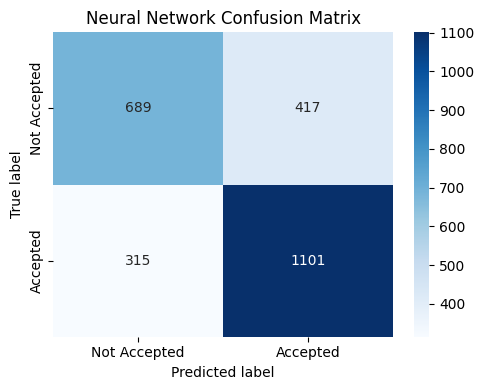


Classification Report (Tuned NN):
              precision    recall  f1-score   support

          No       0.69      0.62      0.65      1106
         Yes       0.73      0.78      0.75      1416

    accuracy                           0.71      2522
   macro avg       0.71      0.70      0.70      2522
weighted avg       0.71      0.71      0.71      2522



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_nn = confusion_matrix(y_test_nn, y_pred_nn)
print("Confusion Matrix (Tuned NN):\n", cm_nn)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_nn, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Not Accepted", "Accepted"],
    yticklabels=["Not Accepted", "Accepted"]
)
plt.title("Neural Network Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

print("\nClassification Report (Tuned NN):")
print(classification_report(y_test_nn, y_pred_nn, target_names=["No", "Yes"]))

### ROC Curve, Precision-Recall Curve, and AUC

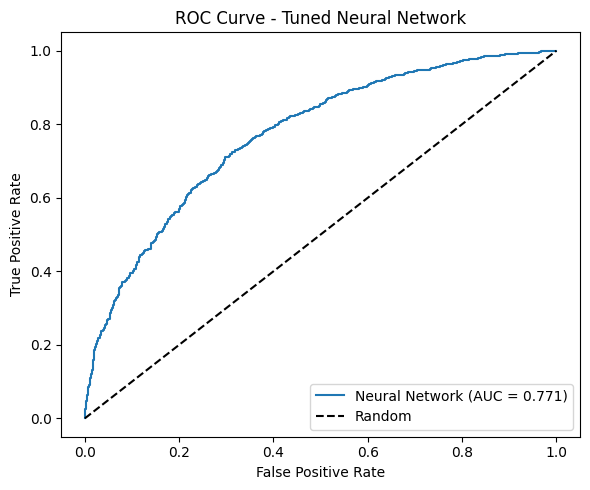

In [40]:
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, y_prob_nn)

plt.figure(figsize=(6, 5))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Neural Network")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

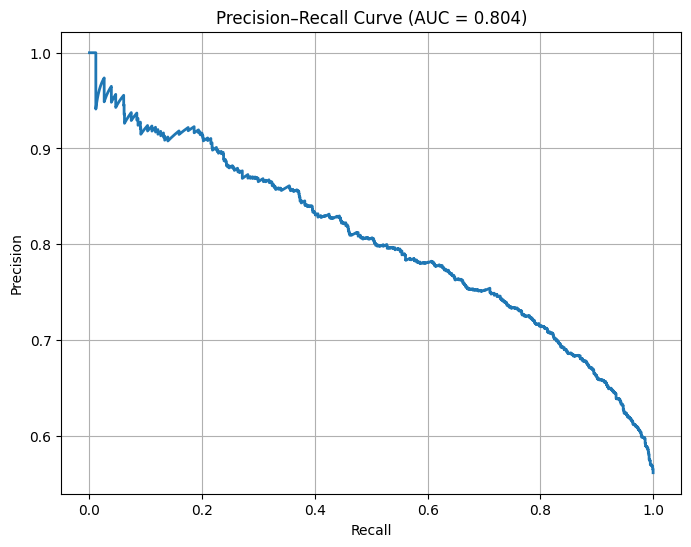

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Probabilities for the positive class (coupon accepted = 1)
y_prob_nn = tuned_nn.predict_proba(X_test_nn)[:, 1]

# Compute precision, recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_nn)

# Compute AUPRC (Area Under Precision–Recall Curve)
avg_precision = average_precision_score(y_test, y_prob_nn)

# Plot the Precision–Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AUC = {avg_precision:.3f})")
plt.grid(True)
plt.show()

### Neural Network Feature Importance

In [42]:
import pandas as pd
import numpy as np

# First layer weight matrix: shape (n_features, n_hidden_units)
first_layer_weights = tuned_nn.coefs_[0]

# Importance = mean absolute weight across hidden units
importance_scores = np.mean(np.abs(first_layer_weights), axis=1)

importance_nn = pd.DataFrame({
    "feature": feature_names,
    "importance": importance_scores
}).sort_values("importance", ascending=False)

top10_nn = importance_nn.head(10)
top10_nn

,feature,importance
4,CoffeeHouse,0.205173
25,coupon_Coffee House,0.198080
3,Bar,0.187800
28,expiration_2h,0.162612
27,coupon_Restaurant_lt_20,0.161360
34,education_Bachelors degree,0.157603
2,income,0.154467
24,coupon_Carry out & Take away,0.152132
26,coupon_Restaurant(20-50),0.148618
30,maritalStatus_Single,0.147347


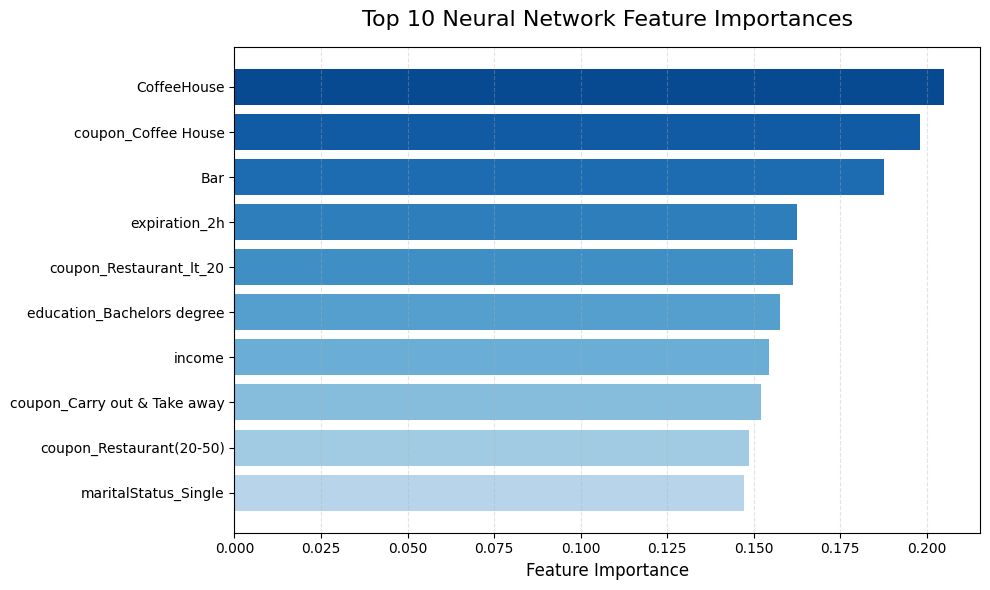

In [43]:
import matplotlib.cm as cm

# Sort lowest → highest for barh orientation
top10_plot = top10_nn.sort_values("importance", ascending=True)

# Gradient colors
colors = cm.Blues(np.linspace(0.3, 0.9, len(top10_plot)))

plt.figure(figsize=(10, 6))
plt.barh(
    top10_plot["feature"],
    top10_plot["importance"],
    color=colors,            # gradient
    edgecolor="none"         # removes borders
)

plt.title("Top 10 Neural Network Feature Importances", fontsize=16, pad=15)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

## Comparing Models

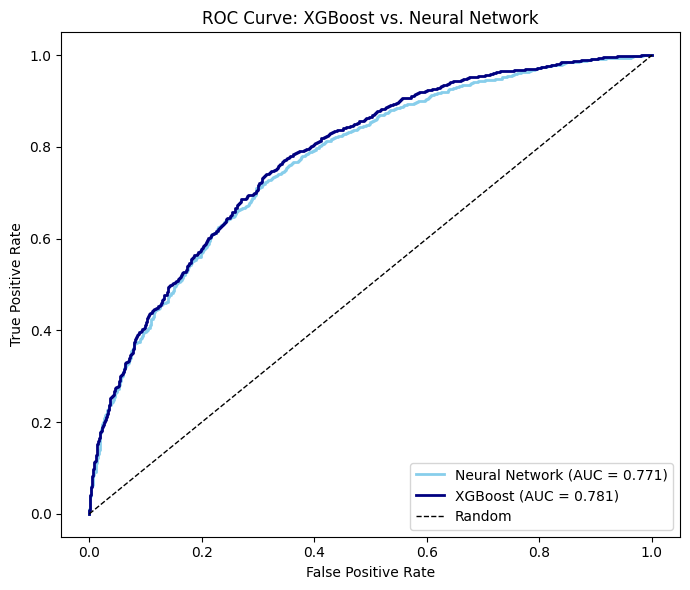

In [44]:
#Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, y_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

#XGBoost
y_proba_tuned = best_model.predict_proba(X_test_final)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

#Plot combined ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr_nn, tpr_nn, color='skyblue', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.3f})')
plt.plot(fpr_tuned, tpr_tuned, color='navy', lw=2, label=f'XGBoost (AUC = {roc_auc_tuned:.3f})')
plt.plot([0, 1], [0, 1], color='k', lw=1, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost vs. Neural Network')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

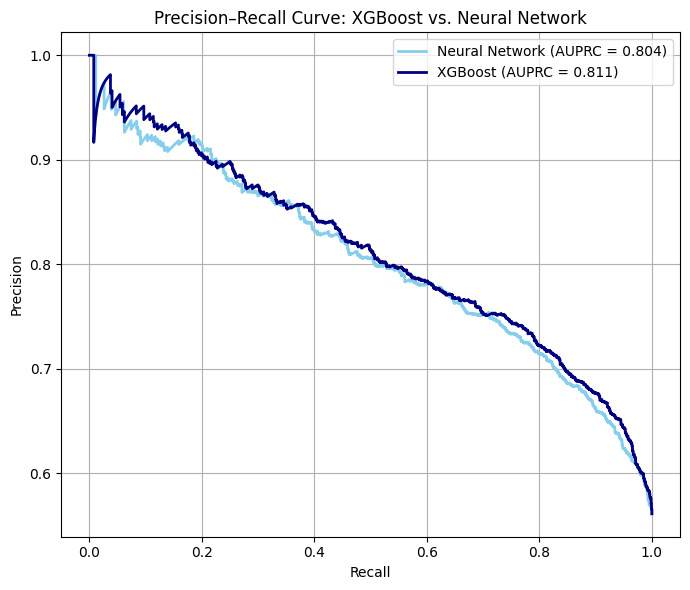

In [45]:
#Neural Network
y_prob_nn = tuned_nn.predict_proba(X_test_nn)[:, 1]
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_prob_nn)
avg_precision_nn = average_precision_score(y_test, y_prob_nn)

#XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_tuned)
avg_precision_xgb = average_precision_score(y_test, y_proba_tuned)

#Plot combined Precision-Recall curve
plt.figure(figsize=(7, 6))
plt.plot(recall_nn, precision_nn, color='skyblue', lw=2, label=f'Neural Network (AUPRC = {avg_precision_nn:.3f})')
plt.plot(recall_xgb, precision_xgb, color='navy', lw=2, label=f'XGBoost (AUPRC = {avg_precision_xgb:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve: XGBoost vs. Neural Network')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f167eb1c-f8c3-46e3-8ad0-eec822609986' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>